

# Project: Investigate a Dataset - No Show Appointment

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

 

## Dataset Description

#### This dataset focuses on the issue of whether or not people show up for their appointment and gathers data from 100k medical appointments in Brazil. Each row contains information on a different patient trait.

* PatientId = Identification of a patient.
* AppointmentID = Identification of each appointment.
* ScheduledDay = tells us on what day the patient set up their appointment.
* Neighborhood indicates the location of the hospital.
* Hipertension = True or False.
* Diabetes= True or False.
* Alcoholism = addiction to the consumption of alcoholic True or False.
* AppointmentDay= The day of the actuall appointment, when they have to visit the doctor.
* Handcap = True or False.
* SMS_received = 1 or more messages sent to the patient.
* Scholarship = indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
* No_show it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

## Research Questions
- Is it possible to anticipate if a patient will show up for their planned appointment based on their gender?
- Is it possible to anticipate if a patient will show up for their planned appointment based on their age?
- five neighborhoods with the highest percentage of missed appointments?
- Is it possible to anticipate whether a patient will show up for an appointment based on the day or month it falls on?
- Is there a trend in the number of people who didnt show up for appointment with characteristics like a disability, alcoholism, hypertension, or scholarship?

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [3]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling


In [4]:
# Load the data. 
# Checking some information of the data
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
#Check the Top 3 rows of the Data
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [6]:
#Check for duplicated info
df.duplicated().sum()

0

In [7]:
#Check some important statistics from the Data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [8]:
#check if there are redundant columns
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [9]:
df["Age"].max(), df["Age"].min()

(115, -1)

## Observation for Data Cleaning
* Hipertension, HandCap  columns needs to be renamed properly
* scheduled day and appointmentday need conversion to datetime format 
* Age column need some cleaning because a value is -1
* AppointmentID can be dropped because it has no duplicate value which means each appointment is unique, it won't provide insights
* Convert Yes and No to  numeric values for easy use

In [10]:
#rename Hipertension and Handcap
df.rename(columns = {'Hipertension': 'Hypertension',
                'Handcap': 'Handicap'}, inplace = True)
#check effect
df.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [11]:
#check Age column value less than 0
df[df["Age"]<0]


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [12]:
df["Age"].median()

37.0

In [13]:
#replace -1 in Age column with the median Age
df["Age"].replace(-1,df["Age"].median(),inplace= True)

In [14]:
#function to clean Date
def CleanDate(x):
    ans=x.split("T")
    return ans[0]

In [15]:
#apply function
df["ScheduledDay"]=df["ScheduledDay"].apply(CleanDate)
df["AppointmentDay"]=df["AppointmentDay"].apply(CleanDate)

In [16]:
#change ScheduleDay and AppointmentDay datatype to datetime
df["ScheduledDay"]=df["ScheduledDay"].astype(pd.datetime)
df["AppointmentDay"]=df["AppointmentDay"].astype(pd.datetime)

In [17]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [18]:
#look up the number of people whose appointment day matches their scheduled day.
df[df["ScheduledDay"]==df["AppointmentDay"]]["PatientId"].count()

38563

In [19]:
#Get Month of schedule and appointment
df["ScheduledMonth"]=pd.DatetimeIndex(df["ScheduledDay"]).month
df["AppointmentMonth"]=pd.DatetimeIndex(df["AppointmentDay"]).month

In [20]:
#Get day of schedule and appointment
df["ScheduledDay"]=pd.DatetimeIndex(df["ScheduledDay"]).day
df["AppointmentDay"]=pd.DatetimeIndex(df["AppointmentDay"]).day

In [21]:
#drop AppointmentID
df.drop("AppointmentID",axis=1,inplace=True)

In [22]:
#Change Yes or No to lowercase for manipulation
def lower(x):
    ans = x.lower()
    return ans
df["No-show"]= df["No-show"].apply(lower)

In [23]:
#Change Yes or No values to numeric 0=No, 1=Yes
df["No-show"].replace("no",0,inplace= True)
df["No-show"].replace("yes",1,inplace= True)

In [24]:
#function to group the Age for Good EDA
def AgeType(x):
    ans=x
    if x<=35:
        return "youth"
    elif x>35:
        return "old"

In [25]:
df["Age_Group"]=df["Age"].apply(AgeType)

<a id='eda'></a>

### Exploratory Data Analysis

### Research Question 1 ( Is it possible to anticipate if a patient will show up for their planned appointment based on their gender?)

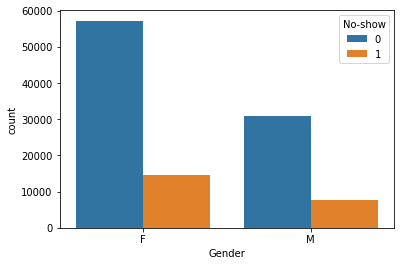

In [26]:
#check how the Genders did against the appointment
sns.countplot(x="Gender",hue="No-show", data=df)

In [27]:
df.groupby("Gender")["No-show"].mean()

Gender
F    0.203146
M    0.199679
Name: No-show, dtype: float64

The ratio of Females showing up for appointment is slightly better than that of the male's

### Research Question 2 ( Is it possible to anticipate if a patient will show up for their planned appointment based on their age?)

In [46]:
#Check the count of the age group
df["Age_Group"].value_counts()

old      57524
youth    53003
Name: Age_Group, dtype: int64

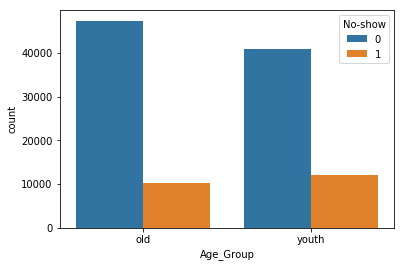

In [28]:
#check how the age groups did against the appointment
sns.countplot(x="Age_Group",hue="No-show", data=df)

In [29]:
df.groupby("Age_Group")["No-show"].mean()

Age_Group
old      0.177648
youth    0.228289
Name: No-show, dtype: float64

The ratio of younger people attending appointments is somewhat greater than that of older people.

### Research Question 3 ( five neighborhoods with the highest percentage of missed appointments?)

In [30]:
#Top 5 Neighbourhoods
df["Neighbourhood"].value_counts().head(5)

JARDIM CAMBURI     7717
MARIA ORTIZ        5805
RESISTÊNCIA        4431
JARDIM DA PENHA    3877
ITARARÉ            3514
Name: Neighbourhood, dtype: int64

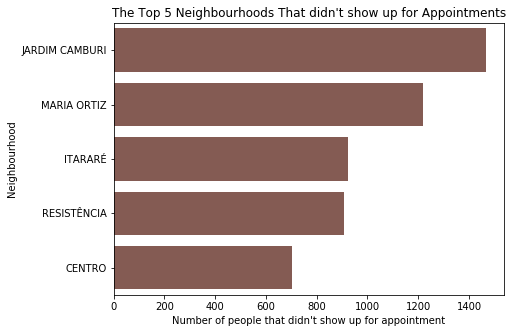

In [32]:
df_no_show = df[df["No-show"] == 1]
base_color = sns.color_palette()[5]

plt.figure(figsize = [7, 5])
cat_order = df_no_show['Neighbourhood'].value_counts().index[:5]
sns.countplot(data = df_no_show, y = 'Neighbourhood', color = base_color, order = cat_order)
plt.title("The Top 5 Neighbourhoods That didn't show up for Appointments")
plt.xlabel("Number of people that didn't show up for appointment")
plt.ylabel("Neighbourhood");

The neighborhood with the highest percentage of missed appointments, JARDIM CAMBURI, was followed by MARIA ORTIZ, as seen in the graph.

### Research Question 4 ( Is it possible to anticipate whether a patient will show up for an appointment based on the day or month it falls on?)

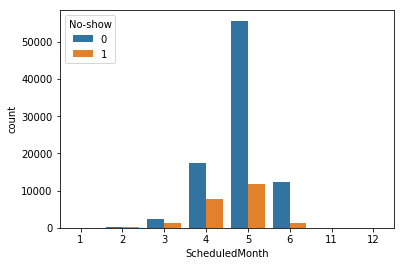

In [33]:
sns.countplot(df["ScheduledMonth"],hue=df["No-show"])

In [34]:
#checking the ratio
df.groupby("ScheduledMonth")["No-show"].mean()

ScheduledMonth
1     0.300000
2     0.291815
3     0.330935
4     0.309760
5     0.174560
6     0.100800
11    0.000000
12    0.311475
Name: No-show, dtype: float64

The biggest proportion of those who missed appointments was in March and December.

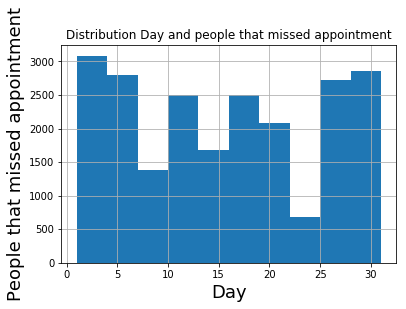

In [35]:
df.ScheduledDay[df["No-show"] == 1].hist(bins = 10);
plt.title('Distribution Day and people that missed appointment')
plt.xlabel('Day', fontsize=18);
plt.ylabel('People that missed appointment', fontsize=18);
plt.legend()

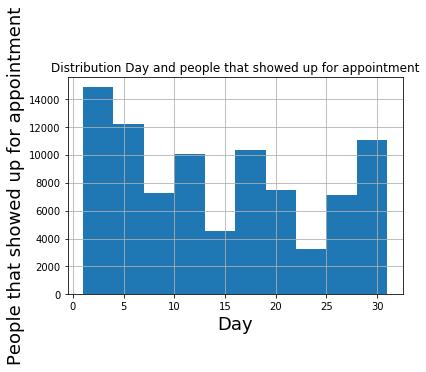

In [36]:
df.ScheduledDay[df["No-show"] == 0].hist(bins = 10);
plt.title('Distribution Day and people that showed up for appointment')
plt.xlabel('Day', fontsize=18);
plt.ylabel('People that showed up for appointment', fontsize=18);
plt.legend()

In [37]:
#checking the ratio
df.groupby("ScheduledDay")["No-show"].mean()

ScheduledDay
1     0.170582
2     0.164804
3     0.180836
4     0.209195
5     0.194206
6     0.168511
7     0.162744
8     0.126469
9     0.174733
10    0.179756
11    0.221132
12    0.193384
13    0.212399
14    0.370720
15    0.362581
16    0.179199
17    0.172319
18    0.225957
19    0.218145
20    0.214780
21    0.297872
22    0.300885
23    0.364807
24    0.153579
25    0.231850
26    0.336172
27    0.311025
28    0.291014
29    0.222490
30    0.152460
31    0.163862
Name: No-show, dtype: float64

14th,15th and 23rd were the days with highest percentage of people that didn't show up for appointment

### Research Question 4 ( Is there a trend in the number of people who didnt show up for appointment with characteristics like a disability, alcoholism, hypertension, or scholarship?)

Text(0.5,1,'Patients with Hypertension No-Show Percentage')

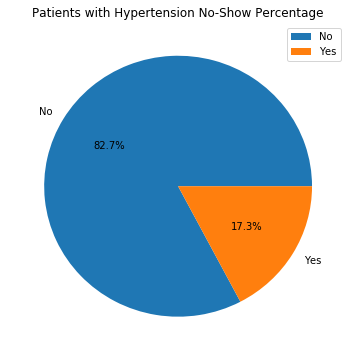

In [38]:
plt.figure(figsize=(6,6))
pie_chart_hypertension = df[df["Hypertension"]==1].groupby("No-show").count()
my_labels = 'No','Yes'
ax_1 = plt.pie(data=pie_chart_hypertension,x="PatientId",labels=my_labels,autopct='%1.1f%%')
plt.legend(loc='upper right')
plt.title('Patients with Hypertension No-Show Percentage')

Text(0.5,1,'Patients with Alcoholism No-Show Percentage')

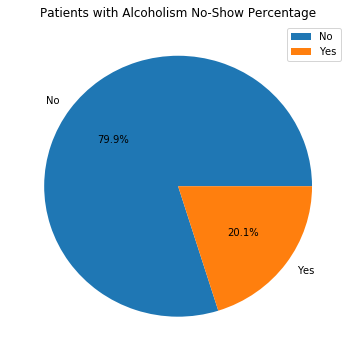

In [39]:
plt.figure(figsize=(6,6))
pie_chart_alcohol = df[df["Alcoholism"]==1].groupby("No-show").count()
my_labels = 'No','Yes'
ax_2 = plt.pie(data=pie_chart_alcohol,x="Alcoholism",labels=my_labels,autopct='%1.1f%%')
plt.legend(loc='upper right')
plt.title('Patients with Alcoholism No-Show Percentage')

Text(0.5,1,'Patients with Disability No-Show Percentage')

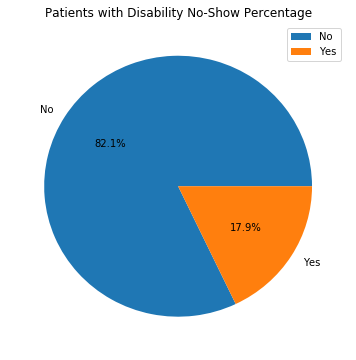

In [40]:
plt.figure(figsize=(6,6))
pie_chart_handicap = df[df["Handicap"]==1].groupby("No-show").count()
my_labels = 'No','Yes'
ax_2 = plt.pie(data=pie_chart_handicap,x="Handicap",labels=my_labels,autopct='%1.1f%%')
plt.legend(loc='upper right')
plt.title('Patients with Disability No-Show Percentage') 

Along with other patients with specialized disorders e.g hypertension,disabled,etc. drinkers are more prone to skip their appointments.

Text(0.5,1,'Patients with Scholarship No-Show Percentage')

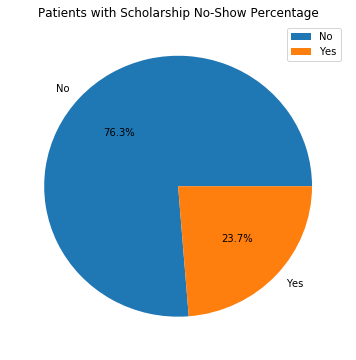

In [41]:
plt.figure(figsize=(6,6))
pie_chart_Scholarship = df[df["Scholarship"]==1].groupby("No-show").count()
my_labels = 'No','Yes'
ax_2 = plt.pie(data=pie_chart_Scholarship,x="Scholarship",labels=my_labels,autopct='%1.1f%%')
plt.legend(loc='upper right')
plt.title('Patients with Scholarship No-Show Percentage') 

Scholarship recipients are more likely to miss their appointment which does actually make sense, they could be busier.

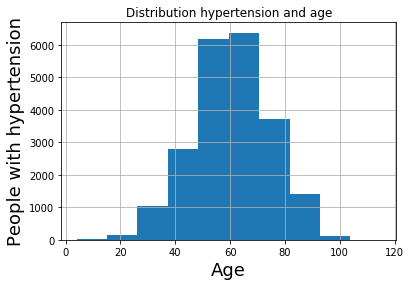

In [42]:
df.Age[df.Hypertension == 1].hist(bins = 10);
plt.title('Distribution hypertension and age')
plt.xlabel('Age', fontsize=18);
plt.ylabel('People with hypertension', fontsize=18);
plt.legend()

In [43]:
df.groupby("Hypertension")["Age"].mean()

Hypertension
0    31.309008
1    60.613596
Name: Age, dtype: float64

We also deduced that within the age range of 60 years upwards , most of the patients likely have hypertension

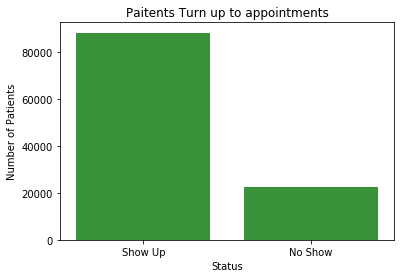

In [44]:
base_color = sns.color_palette()[2]
sns.countplot(data = df, x = 'No-show', color = base_color)
plt.title('Paitents Turn up to appointments')
plt.xticks([0, 1], ['Show Up', 'No Show'])
plt.xlabel('Status')
plt.ylabel('Number of Patients');

this is  to check the number of patients that showed up for appointment and how balanced the values are

<a id='conclusions'></a>

## Conclusions from EDA

1. there's a high percentage of youths that showed up for appointment 
2. the ratio of the female gender that showed up for appointment is higher than the male's
3. The neighborhoods with the most persons who failed to show up for appointments include JARDIM CAMBURI, MARIA ORTIZ, ITARARÉ, RESISTNCIA, and CENTRO.
4. The biggest proportion of those who missed appointments was in March and December.
5. 14th and 23rd were the day with highest percentage of people that didn't show up for appointment
6. Along with other patients with specialized disorders, drinkers are more prone to skip their appointments.
7. Scholarship recipients are more likely to miss their appointment.

In [47]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0